In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#import the dataset
data=pd.read_csv('/content/sample_data/credit_card_fraud_dataset (1).csv')
data

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [ ]:
# Check for null values in each column
null_counts = data.isnull().sum()
null_counts

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


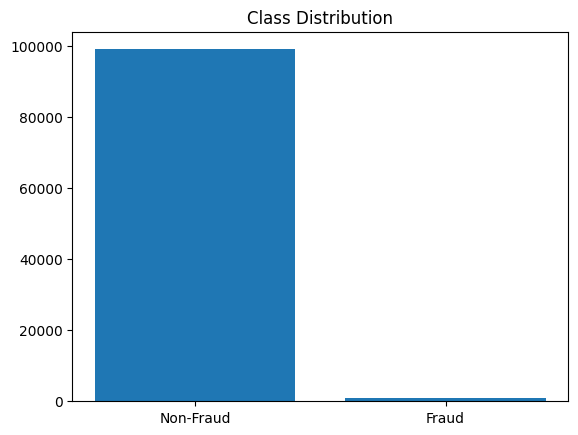

In [ ]:
import matplotlib.pyplot as plt

# Visualize class distribution
class_counts = data['IsFraud'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.title("Class Distribution")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' feature
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Amount'].describe()
# Check the updated dataframe
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,NormalizedAmount
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,1.173161
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,0.112740
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,-1.187661
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,0.705284
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,-1.475326


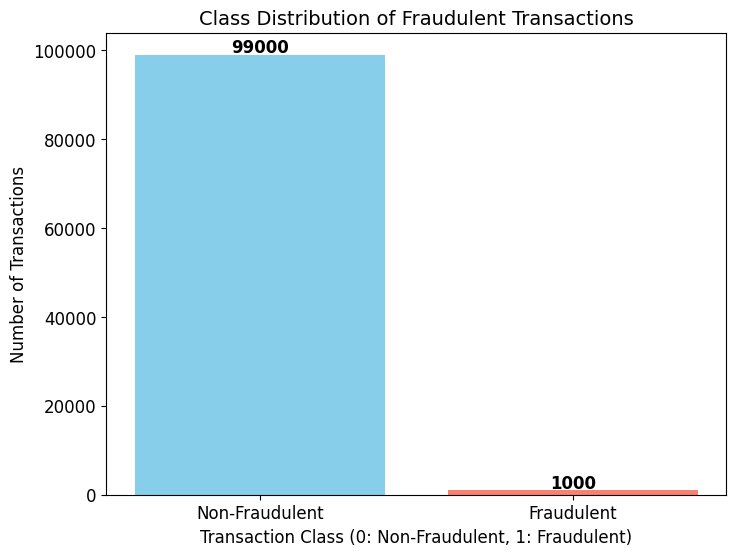

In [ ]:
#check the number of occurrences of each class label and plot the information using matplotlib.

import matplotlib.pyplot as plt

# Visualize class distribution
class_counts = data['IsFraud'].value_counts()
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon']) # Added colors
plt.title("Class Distribution of Fraudulent Transactions", fontsize=14) # Improved title
plt.xlabel("Transaction Class (0: Non-Fraudulent, 1: Fraudulent)", fontsize=12) # Added x-axis label
plt.ylabel("Number of Transactions", fontsize=12) # Added y-axis label
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], fontsize=12)  # Improved tick labels
plt.yticks(fontsize=12) # Increased y-tick label font size

# Add value labels on top of the bars
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 500, str(v), ha='center', fontsize=12, fontweight='bold') # Added value labels

plt.show()


In [ ]:
# Drop irrelevant columns like 'Time', 'Amount', and use 'NormalizedAmount'
X = data.drop(['IsFraud', 'TransactionDate', 'Amount'], axis=1)
Y = data['IsFraud']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (70000, 5)
Shape of X_test: (30000, 5)


In [ ]:
for column in X_train.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Check resampled shape
print("\nResampled X_train shape:", X_train_resampled.shape)
print("Resampled Y_train shape:", Y_train_resampled.shape)



Resampled X_train shape: (138628, 5)
Resampled Y_train shape: (138628,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, Y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

# Predict using the trained model
Y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.99      0.92      0.95     29686
           1       0.01      0.10      0.02       314

    accuracy                           0.91     30000
   macro avg       0.50      0.51      0.49     30000
weighted avg       0.98      0.91      0.94     30000



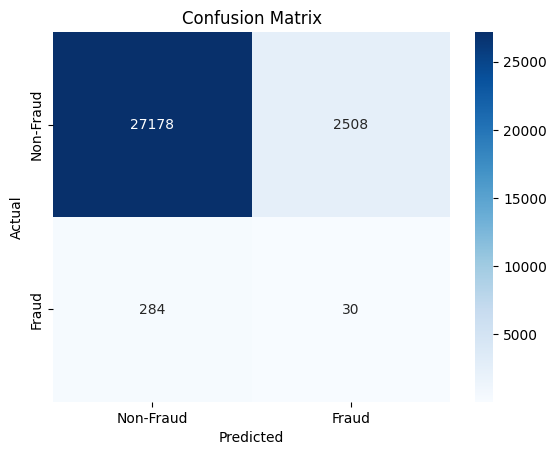

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



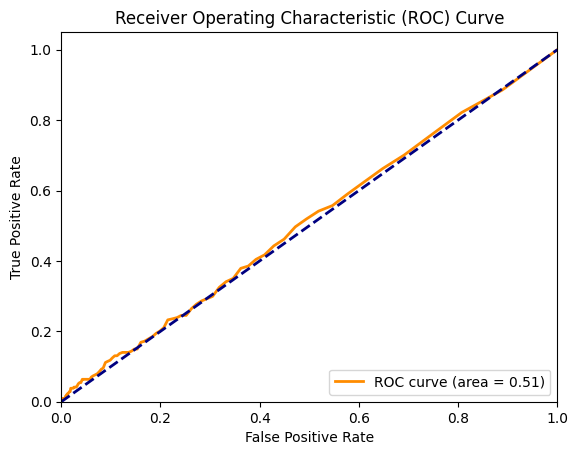

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Apply SMOTE to balance the classes in the training set
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Train Random Forest Classifier on the resampled data
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_train_resampled, Y_train_resampled)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     29686
           1       0.01      0.10      0.02       314

    accuracy                           0.91     30000
   macro avg       0.50      0.51      0.49     30000
weighted avg       0.98      0.91      0.94     30000



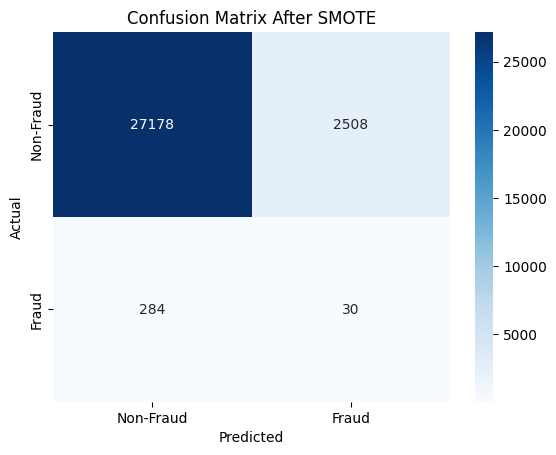

In [ ]:
# Predict using the trained model on resampled data
Y_pred_resampled = rf_resampled.predict(X_test)

# Print classification report
print(classification_report(Y_test, Y_pred_resampled))

# Plot confusion matrix after resampling
cm_resampled = confusion_matrix(Y_test, Y_pred_resampled)
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix After SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Summary of the Random Forest model's performance
print(f"Model Performance (with and without SMOTE):")
print("Random Forest (Without SMOTE):")
print(classification_report(Y_test, Y_pred))
print("Random Forest (With SMOTE):")
print(classification_report(Y_test, Y_pred_resampled))


Model Performance (with and without SMOTE):
Random Forest (Without SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     29686
           1       0.01      0.10      0.02       314

    accuracy                           0.91     30000
   macro avg       0.50      0.51      0.49     30000
weighted avg       0.98      0.91      0.94     30000

Random Forest (With SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     29686
           1       0.01      0.10      0.02       314

    accuracy                           0.91     30000
   macro avg       0.50      0.51      0.49     30000
weighted avg       0.98      0.91      0.94     30000

